In [1]:
import os
f = open(os.getenv('HOME')+'/aiffel/yoochoose/data/dataset-README.txt','r')
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()

﻿SUMMARY




This dataset was constructed by YOOCHOOSE GmbH to support participants in the RecSys Challenge 2015.

See  http://recsys.yoochoose.net for details about the challenge.



The YOOCHOOSE dataset contain a collection of sessions from a retailer, where each session

is encapsulating the click events that the user performed in the session.

For some of the sessions, there are also buy events; means that the session ended

with the user bought something from the web shop. The data was collected during several

months in the year of 2014, reflecting the clicks and purchases performed by the users

of an on-line retailer in Europe.  To protect end users privacy, as well as the retailer,

all numbers have been modified. Do not try to reveal the identity of the retailer.



LICENSE


This dataset is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0

International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc-nd

In [2]:
import datetime as dt
from pathlib import Path
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data')
train_path = data_path / 'yoochoose-clicks.dat'
train_path

PosixPath('/aiffel/aiffel/yoochoose/data/yoochoose-clicks.dat')

In [4]:
def load_data(data_path:Path,nrows=None):
    data = pd.read_csv(data_path,sep=',',header=None,usecols=[0,1,2],
     parse_dates=[1],dtype={0:np.int32,2:np.int32},nrows=nrows)
    data.columns = ['SessionId','Time','ItemId']
    return data

In [5]:
data = load_data(train_path,None)
data.sort_values(['SessionId','Time'],inplace=True)
data

,SessionId,Time,ItemId
0,1,2014-04-07 10:51:09.277000+00:00,214536502
1,1,2014-04-07 10:54:09.868000+00:00,214536500
2,1,2014-04-07 10:54:46.998000+00:00,214536506
3,1,2014-04-07 10:57:00.306000+00:00,214577561
4,2,2014-04-07 13:56:37.614000+00:00,214662742
...,...,...,...
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774
32230489,11562158,2014-09-26 05:16:32.904000+00:00,214849132
32230490,11562159,2014-09-26 19:16:28.897000+00:00,214849132


In [6]:
data.SessionId.nunique(), data.ItemId.nunique()

(9249729, 52739)

In [7]:
session_length = data.groupby('SessionId').size()
session_length

SessionId
1           4
2           6
3           3
4           2
6           2
           ..
11562156    2
11562157    2
11562158    3
11562159    1
11562161    1
Length: 9249729, dtype: int64

In [8]:
session_length.median(), session_length.mean()

(2.0, 3.568098481587947)

In [9]:
session_length.min(), session_length.max()

(1, 200)

In [10]:
session_length.describe()

count    9.249729e+06
mean     3.568098e+00
std      3.787520e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.000000e+02
dtype: float64

In [11]:
session_length.quantile(0.999)

41.0

In [12]:
long_session_idx = session_length[session_length==200].index[0]

In [13]:
data[data.SessionId==long_session_idx]

,SessionId,Time,ItemId
580293,189448,2014-04-01 08:56:28.983000+00:00,214830392
580294,189448,2014-04-01 08:56:31.815000+00:00,214830392
580295,189448,2014-04-01 08:57:08.301000+00:00,214830392
580296,189448,2014-04-01 08:57:10.338000+00:00,214830392
580297,189448,2014-04-01 08:58:01.728000+00:00,214830390
...,...,...,...
580488,189448,2014-04-01 10:35:52.400000+00:00,214830137
580489,189448,2014-04-01 10:37:15.094000+00:00,214830118
580490,189448,2014-04-01 10:37:35.955000+00:00,214830118
580491,189448,2014-04-01 10:37:37.098000+00:00,214830118


In [14]:
length_count = session_length.groupby(session_length).size()

In [15]:
length_percent_cumsum = length_count.cumsum()/length_count.sum()

In [16]:
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]
length_percent_cumsum_999

1     0.136189
2     0.520858
3     0.695280
4     0.796461
5     0.855125
6     0.894389
7     0.920036
8     0.938321
9     0.951293
10    0.961084
11    0.968267
12    0.973959
13    0.978320
14    0.981815
15    0.984587
16    0.986837
17    0.988673
18    0.990201
19    0.991460
20    0.992520
21    0.993436
22    0.994207
23    0.994871
24    0.995444
25    0.995920
26    0.996342
27    0.996714
28    0.997042
29    0.997330
30    0.997577
31    0.997796
32    0.998001
33    0.998177
34    0.998327
35    0.998461
36    0.998590
37    0.998706
38    0.998805
39    0.998896
40    0.998981
dtype: float64

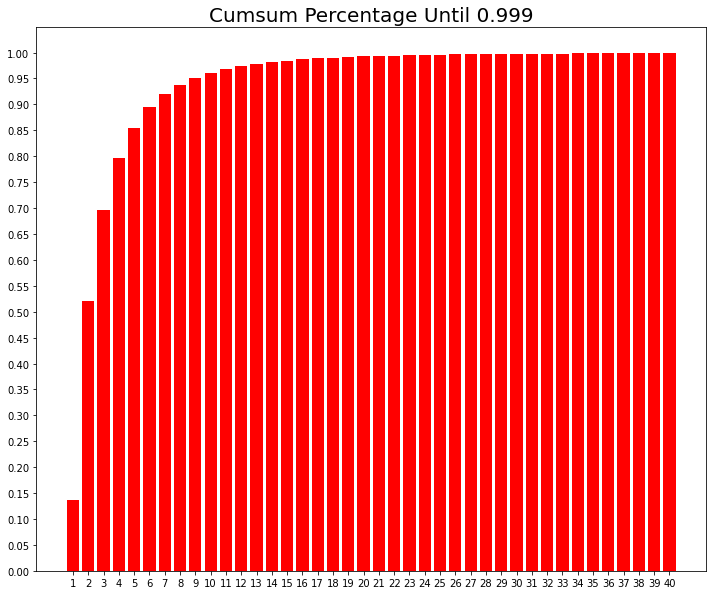

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.bar(x=length_percent_cumsum_999.index,
       height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

In [18]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest,latest)

2014-04-01 03:00:00.124000+00:00 2014-09-30 02:59:59.430000+00:00


In [19]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
month_ago = latest - dt.timedelta(30)
data = data[data['Time'] > month_ago]
data

,SessionId,Time,ItemId
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420
26838214,9194112,2014-09-01 13:26:36.292000+00:00,214853422
...,...,...,...
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774
32230489,11562158,2014-09-26 05:16:32.904000+00:00,214849132
32230490,11562159,2014-09-26 19:16:28.897000+00:00,214849132


In [21]:
def cleanse_recursive(data:pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data,shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data

def cleanse_short_session(data:pd.DataFrame, shortest):
    session_len = data.groupby('SessionId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['SessionId'].isin(session_use)]
    return data

def cleanse_unpopular_item(data:pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data


In [22]:
data = cleanse_recursive(data, shortest=2, least_click=5)
data

,SessionId,Time,ItemId
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207
...,...,...,...
32230485,11562157,2014-09-25 12:31:10.391000+00:00,214580372
32230486,11562157,2014-09-25 12:31:29.679000+00:00,214516012
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774


In [23]:
test_path = data_path / 'yoochoose-test.dat'
test = load_data(test_path)
test['Time'].min(), test['Time'].max()

(Timestamp('2014-04-01 03:00:08.250000+0000', tz='UTC'),
 Timestamp('2014-09-30 02:59:23.866000+0000', tz='UTC'))

In [24]:
def split_by_date(data:pd.DataFrame, n_days:int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('SessionId')['Time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index
    
    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [25]:
tr, test = split_by_date(data, n_days=1)
tr, val = split_by_date(tr, n_days=1)

In [26]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["SessionId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [27]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test,'test')

* train Set Stats Info
	 Events: 5125100
	 Sessions: 1243431
	 Items: 20153
	 First Time : 2014-08-31 03:00:01.111000+00:00
	 Last Time : 2014-09-28 02:57:34.348000+00:00

* valid Set Stats Info
	 Events: 58074
	 Sessions: 12350
	 Items: 6232
	 First Time : 2014-09-28 03:00:25.298000+00:00
	 Last Time : 2014-09-29 02:58:27.660000+00:00

* test Set Stats Info
	 Events: 71009
	 Sessions: 15289
	 Items: 6580
	 First Time : 2014-09-29 02:37:20.695000+00:00
	 Last Time : 2014-09-30 02:59:59.430000+00:00



In [28]:
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}
def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x,-1))# id2idx에 없는 아이템은 모르는 값(-1) 처리
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [29]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

In [30]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""
    
    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['SessionId'].nunique())
        
    def get_click_offsets(self):
        """
        Return the indexed of the first click of each session IDs
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

In [31]:
tr_dataset  = SessionDataset(tr)
tr_dataset.df.head(5)

,SessionId,Time,ItemId,item_idx
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420,0
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942,1
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878,2
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420,0
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207,3


In [32]:
tr_dataset.click_offsets

array([      0,       4,       6, ..., 5125095, 5125097, 5125100],
      dtype=int32)

In [33]:
tr_dataset.session_idx

array([      0,       1,       2, ..., 1243428, 1243429, 1243430])

In [164]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [165]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

,userid,itemid,rating,time,item_idx
28225,195,2808,3,2003-02-02 21:08:38,0
27759,195,1254,4,2003-02-06 17:23:42,1
27921,195,1456,2,2003-02-08 00:07:32,2
28443,195,468,3,2003-02-11 17:42:36,3
28255,195,2748,1,2003-02-11 18:23:28,4
28281,195,410,2,2003-02-11 18:23:28,5
28389,195,2791,3,2003-02-11 18:23:28,6
28391,195,2792,2,2003-02-11 18:23:28,7
27781,195,3007,4,2003-02-11 18:26:30,8
27764,195,1183,3,2003-02-11 18:34:54,9


In [166]:
iter_ex = iter(tr_data_loader)

In [167]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 0 18 25 46]
Label Item Idx are :       [ 1 19 26 47]
Previous Masked Input Idx are []


In [168]:
def mrr_k(pred, truth: int, k:int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0
    
def recall_k(pred, truth:int, k:int)-> int:
    answer = truth in pred[:k]
    return int(answer)

In [169]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm.auto import tqdm

In [170]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [172]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tf
        self.val = val
        self.test = test
        self.num_items = tr['itemid'].nunique()
        self.num_sessions = tr['userid'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=2048, hsz=50, drop_rate=0.1, lr=0.001, epochs=3, k=20)

In [173]:
model = create_model(args)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(2048, 1, 853)]          0         
_________________________________________________________________
GRU (GRU)                    [(2048, 50), (2048, 50)]  135750    
_________________________________________________________________
dropout_2 (Dropout)          (2048, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (2048, 853)               43503     
Total params: 179,253
Trainable params: 179,253
Non-trainable params: 0
_________________________________________________________________


In [174]:
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)
    
    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train',mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)
            
            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)
            
            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])
            
        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)
        
        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")
def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name="GRU") # model gru layer 추출
    hidden_states = gru_layer.states[0].numpy() # layer parameter 추출
    for elt in mask:
        hidden_states[elt, :] = 0 # parameter 초기화
    gru_layer.reset_states(states=hidden_states)

def get_metrics(data, model, args, k: int): # valid, test셋 평가
                                            # train과 거의 같으나, mrr, recall 까지 구함
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []
    
    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)
        
        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction="DESCENDING") # softmax 값이 큰 순서대로 sort
        
        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])
    
    recall, mrr = np.mnean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [44]:
# 학습 시간이 다소 오래 소요됩니다. 아래 주석을 풀지 마세요.
# train_model(model, args)

# 학습된 모델을 불러옵니다.
model = tf.keras.models.load_model(data_path / 'trained_model')

In [45]:
#def test_model(model, args, test):
#    test_recall, test_mrr = get_metrics(test, model, args, 20)
#    print(f"\t - Recall@{args.k}: {test_recall:3f}")
#    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

#test_model(model, args, test)

# 프로젝트

1. Movielens 데이터셋을 session based recommendation 관점으로 전처리  
- 데이터셋 분석 토대로 세션단위 정의과정(길이분석, 시간분석)을 합리적으로 수행
2. RNN 기반의 예측 모델이 정상 구성되어 안정적 훈련 진행
- 적절 epoch만큼 학습 진행, train loss 감소, validation recall MPR 개선 확인
3. 세션정의 모델구조 하이퍼 파라미터 변경 실험 후 Recall, MPR 변화추이 관찰  
- 3가지 이상 변화 시도하고 실험결과 체계적 분석

In [1]:
import datetime as dt
from pathlib import Path
import os

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', 
                       header=None, usecols=[0, 1, 2, 3], 
                       names = ['UserId', 'ItemId', 'Rating', 'Time'],
                       dtype={0: np.int32, 1: np.int32, 2: np.int32}, 
                       nrows=nrows)
    return data
data = load_data(train_path, None)
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data.sort_values(['UserId', 'Time'], inplace=True) 
data

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19
22,1,1270,5,2000-12-31 22:00:55
27,1,1721,4,2000-12-31 22:00:55
37,1,1022,5,2000-12-31 22:00:55
24,1,2340,3,2000-12-31 22:01:43
...,...,...,...,...
1000019,6040,2917,4,2001-08-10 14:40:29
999988,6040,1921,4,2001-08-10 14:41:04
1000172,6040,1784,3,2001-08-10 14:41:04
1000167,6040,161,3,2001-08-10 14:41:26


In [3]:
data['UserId'].nunique(), data['ItemId'].nunique()

(6040, 3706)

In [5]:
# 유저의 세션 기준으로 정렬
user_length = data.groupby('UserId').size()
user_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [6]:
#유저 행동 중간값, 평균값
user_length.median(), user_length.mean()

(96.0, 165.5975165562914)

In [7]:
# 최소, 최대 값
user_length.min(), user_length.max()

(20, 2314)

In [8]:
user_length.quantile(0.99)

906.659999999998

In [9]:
# 유저 행동이 최대치인 유저
long_session = user_length[user_length==2314].index[0]
data[data['UserId']==long_session].head(20)

,UserId,ItemId,Rating,Time
696969,4169,1268,5,2000-08-03 20:09:52
697168,4169,2617,4,2000-08-03 20:09:52
697185,4169,2628,4,2000-08-03 20:09:52
697219,4169,2653,4,2000-08-03 20:09:52
697275,4169,423,3,2000-08-03 20:09:52
696168,4169,3801,5,2000-08-03 20:11:21
696250,4169,3841,2,2000-08-03 20:11:21
697903,4169,3761,3,2000-08-03 20:11:21
697954,4169,3788,3,2000-08-03 20:11:21
695653,4169,3794,4,2000-08-03 20:11:59


In [10]:
length_count = user_length.groupby(user_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_99 = length_percent_cumsum[length_percent_cumsum < 0.99]

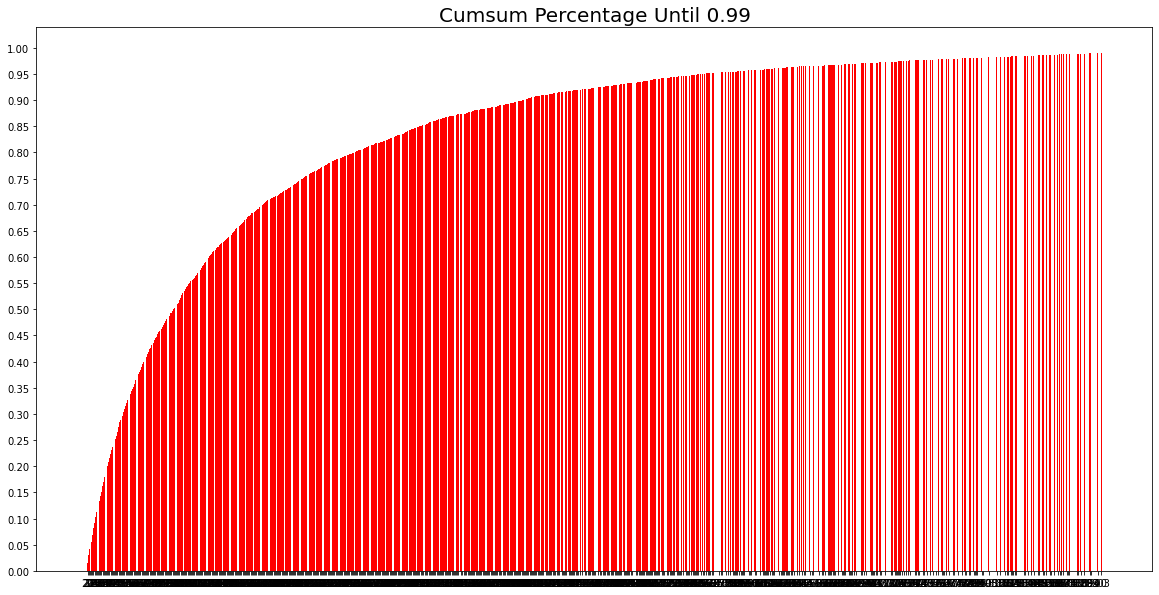

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_99.index,
        height=length_percent_cumsum_99, color='red')
plt.xticks(length_percent_cumsum_99.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.99', size=20)
plt.show()

In [12]:
# 3년치 데이터
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest) 
print(latest)

2000-04-25 23:05:32
2003-02-28 17:49:50


In [13]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
#monthly = recent - dt.timedelta(30)
#df = df[df.time > monthly]
#df

In [15]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_view) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_view)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    user_len = data.groupby('UserId').size()
    user_use = user_len[user_len >= shortest].index
    data = data[data['UserId'].isin(user_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [16]:
user_len = data.groupby('UserId').size()
item_popular = data.groupby('ItemId').size()

print(user_len.mean())
print(item_popular.mean())

165.5975165562914
269.88909875876953


In [17]:
data = cleanse_recursive(data, shortest=4, least_view=2)
data

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19
22,1,1270,5,2000-12-31 22:00:55
27,1,1721,4,2000-12-31 22:00:55
37,1,1022,5,2000-12-31 22:00:55
24,1,2340,3,2000-12-31 22:01:43
...,...,...,...,...
1000019,6040,2917,4,2001-08-10 14:40:29
999988,6040,1921,4,2001-08-10 14:41:04
1000172,6040,1784,3,2001-08-10 14:41:04
1000167,6040,161,3,2001-08-10 14:41:26


In [18]:
data = data.sort_values(by=['Time'])

In [19]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    user_last_time = data.groupby('UserId')['Time'].max().sort_values()
    user_in_train = data[data['Time'] < final_time - dt.timedelta(n_days)]
    user_in_test = data[data['Time'] >= final_time - dt.timedelta(n_days)]
    
    before_date = user_in_train
    after_date = user_in_test
    return before_date, after_date

In [20]:
tr, test = split_by_date(data, n_days=240)
tr, val = split_by_date(tr, n_days=240)

In [21]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Users: {data["UserId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [22]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 966886
	 Users: 6037
	 Items: 3589
	 First Time : 2000-04-25 23:05:32
	 Last Time : 2001-11-05 15:02:43

* valid Set Stats Info
	 Events: 20572
	 Users: 546
	 Items: 2879
	 First Time : 2001-11-05 19:22:09
	 Last Time : 2002-07-03 17:31:04

* test Set Stats Info
	 Events: 12637
	 Users: 387
	 Items: 2585
	 First Time : 2002-07-03 23:06:51
	 Last Time : 2003-02-28 17:49:50



In [23]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [24]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

In [25]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['UserId'].nunique())  # indexing to UserId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['UserId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('UserId').size().cumsum()
        return offsets

In [26]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,UserId,ItemId,Rating,Time,item_idx
1000138,6040,858,4,2000-04-25 23:05:32,0
999873,6040,593,5,2000-04-25 23:05:54,1
1000153,6040,2384,4,2000-04-25 23:05:54,2
1000007,6040,1961,4,2000-04-25 23:06:17,3
1000192,6040,2019,5,2000-04-25 23:06:17,4
999877,6040,1419,3,2000-04-25 23:07:36,5
999868,6040,573,4,2000-04-25 23:07:36,6
999980,6040,3505,4,2000-04-25 23:07:36,7
999967,6040,3111,5,2000-04-25 23:07:36,8
999920,6040,213,5,2000-04-25 23:07:36,9


In [27]:
tr_dataset.click_offsets

array([     0,     53,    182, ..., 966422, 966545, 966886], dtype=int32)

In [28]:
tr_dataset.session_idx

array([   0,    1,    2, ..., 6034, 6035, 6036])

In [29]:
tr_dataset.click_offsets

array([     0,     53,    182, ..., 966422, 966545, 966886], dtype=int32)

In [30]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [31]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head

<bound method NDFrame.head of          UserId  ItemId  Rating                Time  item_idx
1000138    6040     858       4 2000-04-25 23:05:32         0
999873     6040     593       5 2000-04-25 23:05:54         1
1000153    6040    2384       4 2000-04-25 23:05:54         2
1000007    6040    1961       4 2000-04-25 23:06:17         3
1000192    6040    2019       5 2000-04-25 23:06:17         4
...         ...     ...     ...                 ...       ...
495325     3041     214       5 2001-11-05 10:27:27      2233
495399     3041    2959       5 2001-11-05 10:29:10      1073
495357     3041    3176       5 2001-11-05 10:32:03       349
495395     3041     381       5 2001-11-05 10:32:32      1460
710025     4258    3745       3 2001-11-05 15:02:43      3047

[966886 rows x 5 columns]>

In [32]:
iter_ex = iter(tr_data_loader)

In [33]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [  0  53 106 210]
Label Item Idx are :       [  1  54 177 211]
Previous Masked Input Idx are []


In [34]:
def mrr_k(pred, truth: int, k:int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0
    
def recall_k(pred, truth:int, k:int)-> int:
    answer = truth in pred[:k]
    return int(answer)

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm.auto import tqdm

In [36]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [37]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_users = tr['UserId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=256, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)

In [38]:
# train 셋으로 학습하면서 valid 셋으로 검증합니다.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['UserId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화합니다. 아래 메서드에서 확인해주세요.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # model에서 gru layer를 가져옵니다.
    hidden_states = gru_layer.states[0].numpy()  # gru_layer의 parameter를 가져옵니다.
    for elt in mask:  # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
        hidden_states[elt, :] = 0  # parameter를 초기화 합니다.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # valid셋과 test셋을 평가하는 코드입니다. 
                                             # train과 거의 같지만 mrr, recall을 구하는 라인이 있습니다.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['UserId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)
        pred = model.predict(input_ohe, batch_size=args.batch_size)
#         pred_arg = tf.nn.top_k(pred, k=124, sorted=True)[1]  # softmax 값이 큰 순서대로 sorting 합니다.
        pred_arg = tf.argsort(pred, direction='DESCENDING')
    
        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [39]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")



In [40]:
# 학습된 모델을 불러옵니다.
model = tf.keras.models.load_model(data_path / 'trained_model')

1 모델, 로딩 후 훈련

In [41]:
args = Args(tr,val,test,batch_size=128, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)
model = create_model(args)
train_model(model, args)
test_model(model, args, test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(128, 1, 3589)]          0         
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    546150    
_________________________________________________________________
dropout (Dropout)            (128, 50)                 0         
_________________________________________________________________
dense (Dense)                (128, 3589)               183039    
Total params: 729,189
Trainable params: 729,189
Non-trainable params: 0
_________________________________________________________________


Train:   0%|          | 0/7506 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/156 [00:00<?, ?it/s]

	 - Recall@20 epoch 1: 0.111266
	 - MRR@20    epoch 1: 0.023568



Train:   0%|          | 0/7506 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/156 [00:00<?, ?it/s]

	 - Recall@20 epoch 2: 0.141201
	 - MRR@20    epoch 2: 0.031665



Train:   0%|          | 0/7506 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/156 [00:00<?, ?it/s]

	 - Recall@20 epoch 3: 0.145724
	 - MRR@20    epoch 3: 0.033564



Train:   0%|          | 0/7506 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/156 [00:00<?, ?it/s]

	 - Recall@20 epoch 4: 0.149013
	 - MRR@20    epoch 4: 0.035159



Train:   0%|          | 0/7506 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/156 [00:00<?, ?it/s]

	 - Recall@20 epoch 5: 0.149424
	 - MRR@20    epoch 5: 0.035791



Evaluation:   0%|          | 0/95 [00:00<?, ?it/s]

	 - Recall@20: 0.129084
	 - MRR@20: 0.031185



3 모델 모델 로드 + learning rate up

In [42]:
args = Args(tr,val,test,batch_size=32, hsz=100, drop_rate=0.1, lr=0.002, epochs=5, k=20)
model = create_model(args)
train_model(model, args)
test_model(model, args, test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(32, 1, 3589)]           0         
_________________________________________________________________
GRU (GRU)                    [(32, 100), (32, 100)]    1107300   
_________________________________________________________________
dropout_1 (Dropout)          (32, 100)                 0         
_________________________________________________________________
dense_1 (Dense)              (32, 3589)                362489    
Total params: 1,469,789
Trainable params: 1,469,789
Non-trainable params: 0
_________________________________________________________________


Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 1: 0.150463
	 - MRR@20    epoch 1: 0.035911



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 2: 0.154486
	 - MRR@20    epoch 2: 0.037864



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 3: 0.150628
	 - MRR@20    epoch 3: 0.038283



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 4: 0.149361
	 - MRR@20    epoch 4: 0.037054



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 5: 0.148038
	 - MRR@20    epoch 5: 0.036640



Evaluation:   0%|          | 0/382 [00:00<?, ?it/s]

	 - Recall@20: 0.124294
	 - MRR@20: 0.031313



4 모델 로드 안하고 hsz up

In [43]:
args = Args(tr,val,test,batch_size=32, hsz=200, drop_rate=0.1, lr=0.002, epochs=5, k=20)
model = create_model(args)
train_model(model, args)
test_model(model, args, test)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(32, 1, 3589)]           0         
_________________________________________________________________
GRU (GRU)                    [(32, 200), (32, 200)]    2274600   
_________________________________________________________________
dropout_2 (Dropout)          (32, 200)                 0         
_________________________________________________________________
dense_2 (Dense)              (32, 3589)                721389    
Total params: 2,995,989
Trainable params: 2,995,989
Non-trainable params: 0
_________________________________________________________________


Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 1: 0.150518
	 - MRR@20    epoch 1: 0.037157



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 2: 0.148589
	 - MRR@20    epoch 2: 0.038212



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 3: 0.144125
	 - MRR@20    epoch 3: 0.036632



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 4: 0.139109
	 - MRR@20    epoch 4: 0.036321



Train:   0%|          | 0/30026 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/625 [00:00<?, ?it/s]

	 - Recall@20 epoch 5: 0.137401
	 - MRR@20    epoch 5: 0.034856



Evaluation:   0%|          | 0/382 [00:00<?, ?it/s]

	 - Recall@20: 0.119758
	 - MRR@20: 0.029996



2모델 그냥 훈련 

In [44]:
args = Args(tr,val,test,batch_size=64, hsz=100, drop_rate=0.1, lr=0.001, epochs=5, k=20)
model = create_model(args)
train_model(model, args)
test_model(model, args, test)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(64, 1, 3589)]           0         
_________________________________________________________________
GRU (GRU)                    [(64, 100), (64, 100)]    1107300   
_________________________________________________________________
dropout_3 (Dropout)          (64, 100)                 0         
_________________________________________________________________
dense_3 (Dense)              (64, 3589)                362489    
Total params: 1,469,789
Trainable params: 1,469,789
Non-trainable params: 0
_________________________________________________________________


Train:   0%|          | 0/15013 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/312 [00:00<?, ?it/s]

	 - Recall@20 epoch 1: 0.138633
	 - MRR@20    epoch 1: 0.030928



Train:   0%|          | 0/15013 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/312 [00:00<?, ?it/s]

	 - Recall@20 epoch 2: 0.152702
	 - MRR@20    epoch 2: 0.036022



Train:   0%|          | 0/15013 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/312 [00:00<?, ?it/s]

	 - Recall@20 epoch 3: 0.154880
	 - MRR@20    epoch 3: 0.038154



Train:   0%|          | 0/15013 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/312 [00:00<?, ?it/s]

	 - Recall@20 epoch 4: 0.155005
	 - MRR@20    epoch 4: 0.038192



Train:   0%|          | 0/15013 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/312 [00:00<?, ?it/s]

	 - Recall@20 epoch 5: 0.154756
	 - MRR@20    epoch 5: 0.038143



Evaluation:   0%|          | 0/191 [00:00<?, ?it/s]

	 - Recall@20: 0.129306
	 - MRR@20: 0.032641



# 실험종료

하이퍼 파라미터를 변경하며 실험해봤지만 유의미한 결과를 도출하기는 다소 어려웠다
이번 단계에서 문제점이라면 전체적인 추천시스템에 대한 이해가 없던 상황에서 데이터 파이프라인에 손을 댈 수가
없었던 점부터, 모델에 대한 이해도가 전반적으로 부족했고, 특히 커스텀하게 epoch를 돌리는 것은 여전히 취약함을 알게되었다
특히 왜 오류가 나지도 않으면서 훈련과 검증 과정의 퍼센트가 완료되지 않는 지도 미지수이고 추후 복습 때 알아봐야할 주요 관문이 될 듯 하다
예제 때에 비해서 데이터량이 다소 적어서 그런지 최근 며칠내의 데이터로만 하기에는 데이터가 3천개 정도로 터무니 없이 작아졌기에 시도해볼 수 없었던 점이 아쉽고 다음 얻게 되는 데이터를 통해서는 좀 더 실직적인 학습과 예측을 시도해보고 싶다